#### Settings used for the Notebook and helper functions

In [1]:
%run notebook_setup.ipy
from helper import *
from Z2_compute import calc_pol

N_odd =[3,5,7,9,11]
N_even = [4,6,8,10,12]

# Z2 calculator for 1D system on a graphene lattice using Z2pack and Kwant

Below is the polarization calculation for N = odd systems with zigzag termination in Steven Louie PRL paper

In [ ]:
pol_N={}
for N in N_odd:
    Armchair_1d = make_1D_cell(N=N)
    kwant.plot(Armchair_1d,site_color=family_color);
    Armchair_1d = Armchair_1d.finalized()
    kwant.plotter.bands(Armchair_1d,momenta=101);
    act_pos = np.array([Armchair_1d.pos(i) for i in range(2*N)])
    a1,a2 = [Armchair.prim_vecs[0][0],get_width(N,Armchair)]
    red_pos = np.zeros(np.shape(act_pos))
    red_pos[:,0] = act_pos[:,0]/a1
    red_pos[:,1] = act_pos[:,1]/a2
    pol_N[N] = calc_pol(Armchair_1d,red_pos)
print("=============================================")
print("Polarization as a function of N:",pol_N)

# Steven Louie PRL, 2017

![title](./images/Steven_Louie_table.png)

### N = 5 and 7 does not match because they are gapless. 

### The WCC at the ${\Gamma}$ point is not well-defined and the eigenvectors can get mixed. 

### Although simple tight binding implies gapless dispersion, DFT shows that there is a non-zero gap

# DFT bandstrcuture for N=5
![title](./images/band_5.png)

## Steven Louie, PRL 2006 

![title](./images/Steven_Louie_energy_gaps_plot.png)

## Considering the effect of edge termination opens a band gap 

The overlap between the edge bonds parallel to the edge is increased to account for the bond shrinkage due to the termination

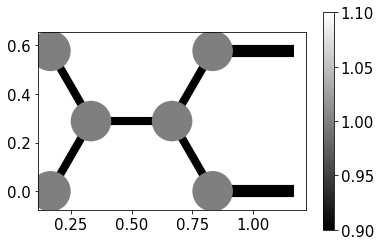

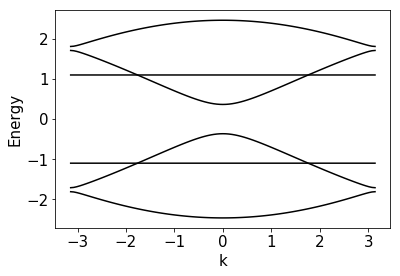


+----------------------------------------------------------------------+
|  ================                                                    |
|  LINE CALCULATION                                                    |
|  ================                                                    |
|  starting at 2019-03-18 16:20:52,293                                 |
|  running Z2Pack version 2.1.1                                        |
|                                                                      |
|  init_result: None                                                   |
|  iterator:    range(3, 501, 2)                                       |
|  line:        <function calc_pol.<locals>.<lambda> at 0x115529e18>   |
|  load:        False                                                  |
|  load_quiet:  True                                                   |
|  pos_tol:     0.01                                                   |
|  save_file:   None                              

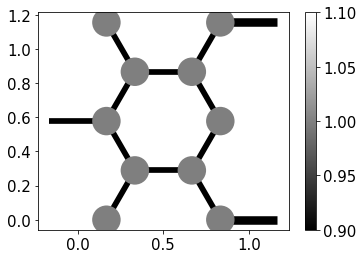

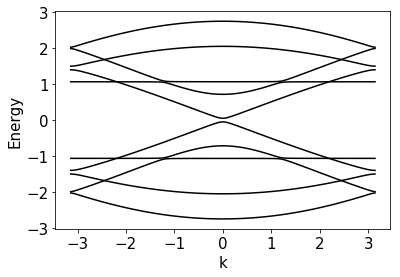


+----------------------------------------------------------------------+
|  ================                                                    |
|  LINE CALCULATION                                                    |
|  ================                                                    |
|  starting at 2019-03-18 16:20:52,660                                 |
|  running Z2Pack version 2.1.1                                        |
|                                                                      |
|  init_result: None                                                   |
|  iterator:    range(3, 501, 2)                                       |
|  line:        <function calc_pol.<locals>.<lambda> at 0x1156f2598>   |
|  load:        False                                                  |
|  load_quiet:  True                                                   |
|  pos_tol:     0.01                                                   |
|  save_file:   None                              

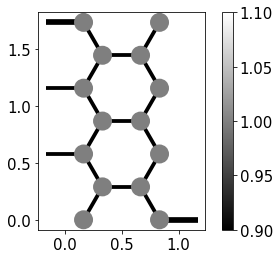

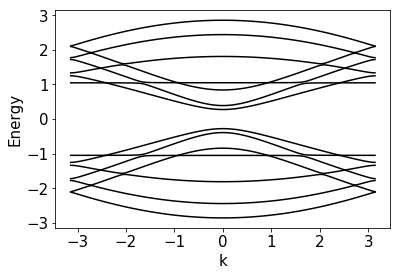


+----------------------------------------------------------------------+
|  ================                                                    |
|  LINE CALCULATION                                                    |
|  ================                                                    |
|  starting at 2019-03-18 16:20:53,026                                 |
|  running Z2Pack version 2.1.1                                        |
|                                                                      |
|  init_result: None                                                   |
|  iterator:    range(3, 501, 2)                                       |
|  line:        <function calc_pol.<locals>.<lambda> at 0x115883950>   |
|  load:        False                                                  |
|  load_quiet:  True                                                   |
|  pos_tol:     0.01                                                   |
|  save_file:   None                              

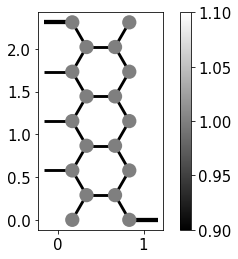

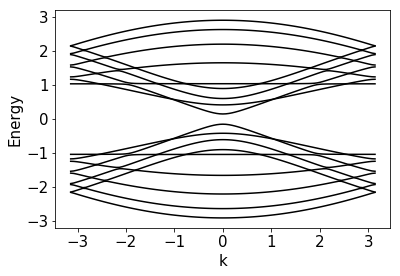


+----------------------------------------------------------------------+
|  ================                                                    |
|  LINE CALCULATION                                                    |
|  ================                                                    |
|  starting at 2019-03-18 16:20:53,494                                 |
|  running Z2Pack version 2.1.1                                        |
|                                                                      |
|  init_result: None                                                   |
|  iterator:    range(3, 501, 2)                                       |
|  line:        <function calc_pol.<locals>.<lambda> at 0x1158837b8>   |
|  load:        False                                                  |
|  load_quiet:  True                                                   |
|  pos_tol:     0.01                                                   |
|  save_file:   None                              

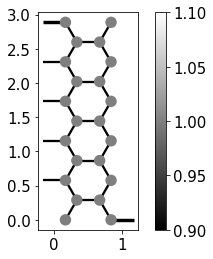

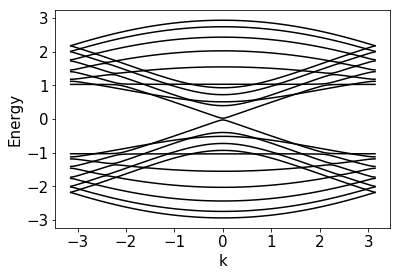


+----------------------------------------------------------------------+
|  ================                                                    |
|  LINE CALCULATION                                                    |
|  ================                                                    |
|  starting at 2019-03-18 16:20:53,981                                 |
|  running Z2Pack version 2.1.1                                        |
|                                                                      |
|  init_result: None                                                   |
|  iterator:    range(3, 501, 2)                                       |
|  line:        <function calc_pol.<locals>.<lambda> at 0x1048b6268>   |
|  load:        False                                                  |
|  load_quiet:  True                                                   |
|  pos_tol:     0.01                                                   |
|  save_file:   None                              

In [2]:
pol_N={}
for N in N_odd:
    Armchair_1d = make_1D_cell(N=N)
    #####################################################
    # Adding edge termination by increasing the overlap #
    # of the edge bonds
    #####################################################
    lat = lat_dict['armchair']
    Armchair_1d = terminate_edges(Armchair_1d,-0.1,3)

    kwant.plot(Armchair_1d,site_color=family_color,hop_lw=hopping_lw(Armchair_1d));
    Armchair_1d = Armchair_1d.finalized()
    kwant.plotter.bands(Armchair_1d,momenta=101);
    act_pos = np.array([Armchair_1d.pos(i) for i in range(2*N)])
    a1,a2 = [Armchair.prim_vecs[0][0],get_width(N,Armchair)]
    red_pos = np.zeros(np.shape(act_pos))
    red_pos[:,0] = act_pos[:,0]/a1
    red_pos[:,1] = act_pos[:,1]/a2
    pol_N[N] = calc_pol(Armchair_1d,red_pos)
print("=============================================")
print("Polarization as a function of N:",pol_N)

## Translating the unit cell box over the fixed lattice changes the Z2 invariant

In [ ]:
pol_N={}
for N in N_odd:
    offset = -1*get_width(1,lat_dict['armchair'])
    Armchair_1d = make_1D_cell(N=N,offset=offset)
    #####################################################
    # Adding edge termination by increasing the overlap #
    # of the edge bonds
    #####################################################
    lat = lat_dict['armchair_trans']
    Armchair_1d = terminate_edges(Armchair_1d,-0.1,3)
    kwant.plot(Armchair_1d,site_color=family_color);
    Armchair_1d = Armchair_1d.finalized()
    kwant.plotter.bands(Armchair_1d,momenta=101);
    act_pos = np.array([Armchair_1d.pos(i) for i in range(2*N)])
    a1,a2 = [Armchair.prim_vecs[0][0],get_width(N,Armchair)]
    red_pos = np.zeros(np.shape(act_pos))
    red_pos[:,0] = act_pos[:,0]/a1
    red_pos[:,1] = act_pos[:,1]/a2
    pol_N[N] = calc_pol(Armchair_1d,red_pos)
print("=============================================")
print("Polarization as a function of N:",pol_N)

All the results from Steven Louie PRL thus agrees after correcting for the termination

# DFT validation

### N=7 (both zigzag and zigzag') and N=6 agrees with PRL and TB

## (Still working)

### N=5 and N=10 are incomplete. Convergence in Z2pack is problematic with DFT. Depends on the number of bands considered for Wannier